In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Circuit Design

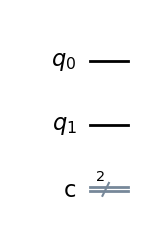

In [3]:
# Create a quantum circuit
# We will use 2 qubits for circuit preparation, and 2 classical bits for measurement/reading the results
qc = QuantumCircuit(2, 2)

# Visualize the circuit
qc.draw('mpl')

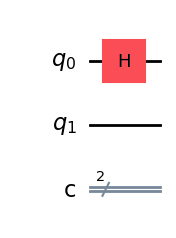

In [4]:
# Add a hadamard gate on qubit 0
qc.h(0)

qc.draw('mpl')

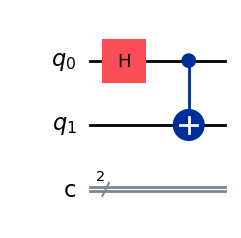

In [5]:
# Add a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

qc.draw('mpl')

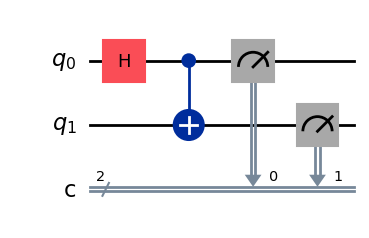

In [6]:
# Measure both qubits and store the result in classical bits
qc.measure([0, 1], [0, 1])

qc.draw('mpl') 

# Circuit simulation

In [7]:
# Simulate the circuit using the qasm simulator
simulator = Aer.get_backend('qasm_simulator')

In [8]:
circuit = transpile(qc, simulator)
job = simulator.run(circuit, shots=1000)

In [9]:
result = job.result()

In [10]:
# Get counts of the results
counts = result.get_counts(qc)

In [11]:
print(counts)

{'11': 478, '00': 522}


# Visualise results

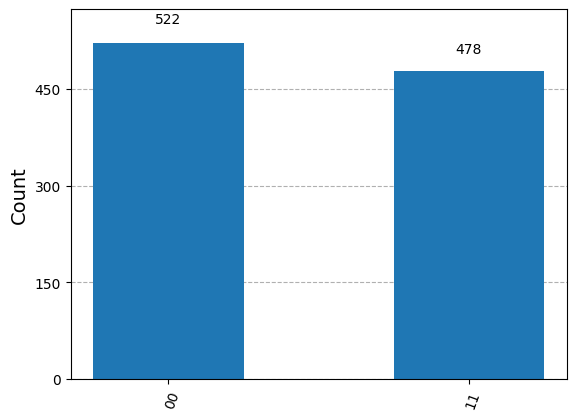

In [12]:
# Visualize the results

plot_histogram(counts)

In [13]:
# Convert shots to probabilities

total_shots = sum(counts.values())
probabilities = {outcome: count/total_shots for outcome, count in counts.items()}
probabilities

{'11': 0.478, '00': 0.522}

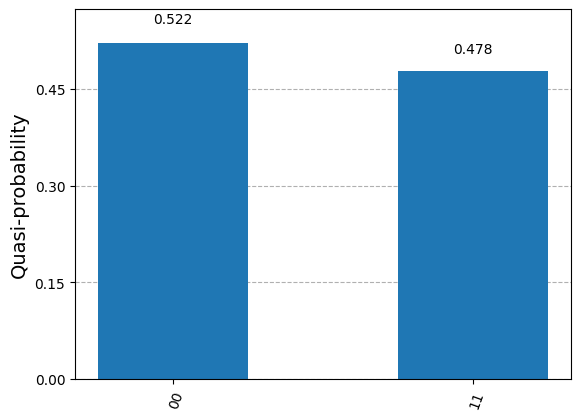

In [14]:
plot_histogram(probabilities)